# Feature Engineering

In [5]:
%run DataCollection-preprocessing.ipynb

In [17]:
# Importing neccessary libraries

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [18]:
# defining stock and Ticker symbol for fetching data
stock="TESLA"
ticker="TSLA"

In [25]:
# data collection
data=Fetch_Data()
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2014-07-14,14.666000,15.252667,14.363333,15.113333,15.113333,108048000,2014-07-14
2014-07-15,15.115333,15.176667,14.540000,14.638667,14.638667,85777500,2014-07-15
2014-07-16,14.788000,14.986667,14.454667,14.477333,14.477333,60667500,2014-07-16
2014-07-17,14.410667,14.703333,14.240000,14.360000,14.360000,69741000,2014-07-17
2014-07-18,14.396667,14.747333,14.395333,14.668000,14.668000,63805500,2014-07-18
...,...,...,...,...,...,...,...
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600,2024-07-08
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900,2024-07-09
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400,2024-07-10


In [26]:
# Calculate Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

# Calculate Relative Strength Index (RSI)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Average Convergence Divergence (MACD)
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Bollinger Bands
data['BB_Middle'] = data['Close'].rolling(window=20).mean()
data['BB_Upper'] = data['BB_Middle'] + 2 * data['Close'].rolling(window=20).std()
data['BB_Lower'] = data['BB_Middle'] - 2 * data['Close'].rolling(window=20).std()

# Calculate Average True Range (ATR)
high_low = data['High'] - data['Low']
high_close = np.abs(data['High'] - data['Close'].shift())
low_close = np.abs(data['Low'] - data['Close'].shift())
true_range = high_low.combine(high_close, max).combine(low_close, max)
data['ATR'] = true_range.rolling(window=14).mean()

# Calculate Volume Weighted Average Price (VWAP)
vwap = (data['Close'] * data['Volume']).cumsum() / data['Volume'].cumsum()
data['VWAP'] = vwap

# Calculate On-Balance Volume (OBV)
obv = np.where(data['Close'] > data['Close'].shift(1), data['Volume'], -data['Volume'])
data['OBV'] = obv.cumsum()

# Calculate Book Value
# Assuming a constant book value per share (BPS) over the period for simplicity. You would need actual book value data.
data['Book_Value'] = 25  # Example constant book value per share. Replace with actual data if available.


In [28]:
data

,Open,High,Low,Close,Adj Close,Volume,Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,BB_Middle,BB_Upper,BB_Lower,ATR,VWAP,OBV,Book_Value
Date,,,,,,,,,,,,,,,,,,,
2014-07-14,14.666000,15.252667,14.363333,15.113333,15.113333,108048000,2014-07-14,NaN,15.113333,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,15.113333,-108048000,25
2014-07-15,15.115333,15.176667,14.540000,14.638667,14.638667,85777500,2014-07-15,NaN,15.094718,NaN,-0.037865,-0.007573,NaN,NaN,NaN,NaN,14.903269,-193825500,25
2014-07-16,14.788000,14.986667,14.454667,14.477333,14.477333,60667500,2014-07-16,NaN,15.070507,NaN,-0.079970,-0.022052,NaN,NaN,NaN,NaN,14.801732,-254493000,25
2014-07-17,14.410667,14.703333,14.240000,14.360000,14.360000,69741000,2014-07-17,NaN,15.042644,NaN,-0.121407,-0.041923,NaN,NaN,NaN,NaN,14.706718,-324234000,25
2014-07-18,14.396667,14.747333,14.395333,14.668000,14.668000,63805500,2014-07-18,NaN,15.027952,NaN,-0.127918,-0.059122,NaN,NaN,NaN,NaN,14.700352,-260428500,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600,2024-07-08,185.3810,191.080492,92.802480,17.209704,9.848130,197.507500,250.668235,144.346764,10.040714,99.335530,15804769600,25
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900,2024-07-09,187.2240,193.874590,92.799188,19.440288,11.766561,201.749999,261.335728,142.164270,10.290713,99.428147,15964980500,25
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400,2024-07-10,189.1234,196.595587,95.666371,21.040544,13.621358,206.223500,270.240202,142.206798,10.623570,99.502791,16093499900,25


In [32]:
# removing null values from dataframe

data = data.dropna(how='any',axis=0)

In [33]:
# Display the data after removing null values
data

,Open,High,Low,Close,Adj Close,Volume,Date,SMA_50,EMA_50,RSI,MACD,MACD_Signal,BB_Middle,BB_Upper,BB_Lower,ATR,VWAP,OBV,Book_Value
Date,,,,,,,,,,,,,,,,,,,
2014-09-22,17.000000,17.068001,16.313999,16.668667,16.668667,123211500,2014-09-22,16.742747,17.028478,28.256144,0.080116,0.346788,18.000633,19.482809,16.518457,0.668667,16.846019,536935500,25
2014-09-23,16.348000,16.920000,16.333332,16.694000,16.694000,84880500,2014-09-23,16.774360,17.015362,29.707269,-0.000518,0.277327,17.960166,19.540456,16.379877,0.672953,16.843060,621816000,25
2014-09-24,16.741333,16.856001,16.469334,16.809334,16.809334,56242500,2014-09-24,16.817773,17.007282,26.691434,-0.054488,0.210964,17.928166,19.576466,16.279867,0.648096,16.842630,678058500,25
2014-09-25,16.834667,16.997334,16.406668,16.463333,16.463333,72513000,2014-09-25,16.857493,16.985951,28.024841,-0.123751,0.144021,17.873833,19.641908,16.105758,0.625858,16.836502,605545500,25
2014-09-26,16.549999,16.648666,16.404667,16.440001,16.440001,56931000,2014-09-26,16.899093,16.964541,22.638322,-0.178469,0.079523,17.816300,19.694620,15.937980,0.607619,16.831536,548614500,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,247.710007,259.440002,244.570007,252.940002,252.940002,157219600,2024-07-08,185.381000,191.080492,92.802480,17.209704,9.848130,197.507500,250.668235,144.346764,10.040714,99.335530,15804769600,25
2024-07-09,251.000000,265.609985,250.300003,262.329987,262.329987,160210900,2024-07-09,187.224000,193.874590,92.799188,19.440288,11.766561,201.749999,261.335728,142.164270,10.290713,99.428147,15964980500,25
2024-07-10,262.799988,267.589996,257.859985,263.260010,263.260010,128519400,2024-07-10,189.123400,196.595587,95.666371,21.040544,13.621358,206.223500,270.240202,142.206798,10.623570,99.502791,16093499900,25


# Feature Impact comparison 

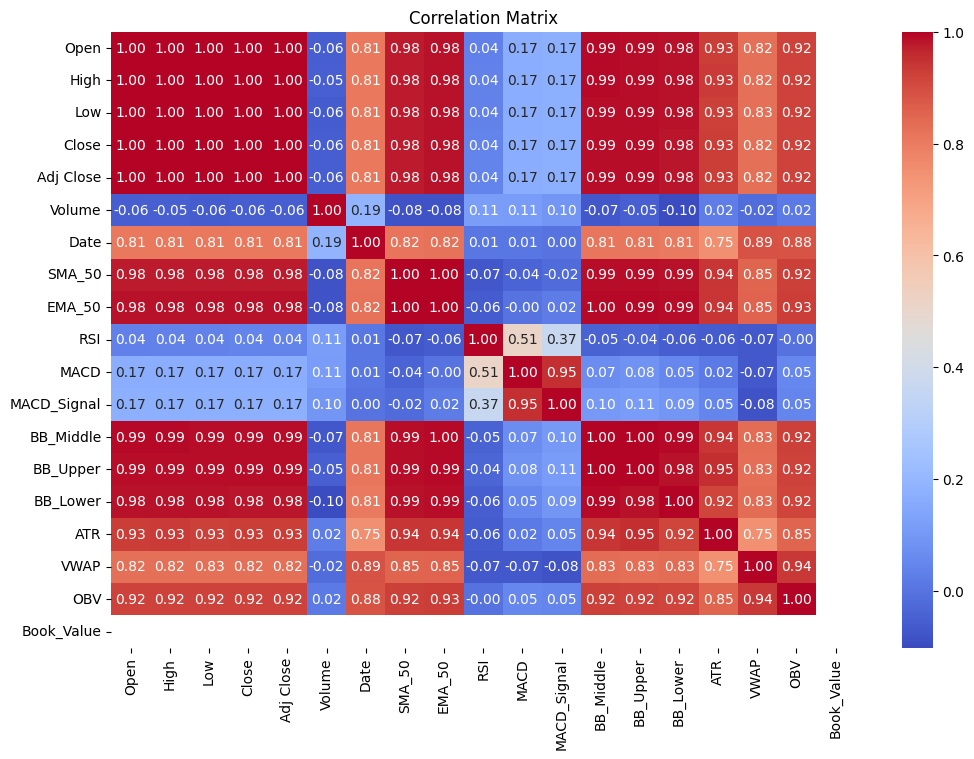

In [34]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


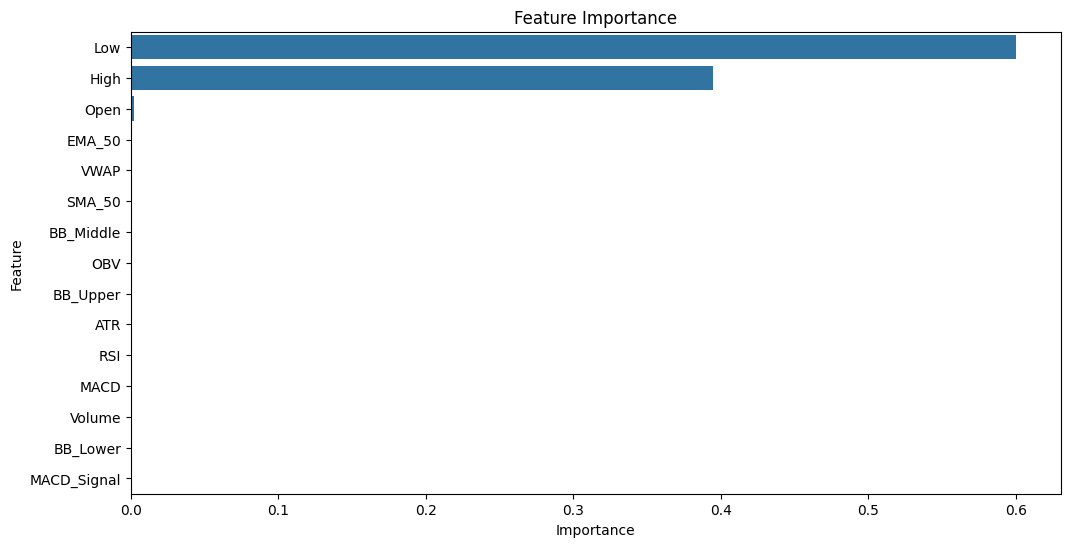

In [37]:
# Prepare the dataset
features = ['Open','High','Low','Volume','SMA_50', 'EMA_50', 'RSI', 'MACD', 'MACD_Signal', 'BB_Middle', 'BB_Upper', 'BB_Lower', 'ATR', 'VWAP', 'OBV']
X = data[features].dropna()
y = data['Close'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


# Insights 